In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import Image

In [2]:
# read in the data set
df = pd.read_csv("retail_analysis.csv")

In [3]:
# check no of rows before data cleaning
len(df)

76466

In [4]:
# Print the summary of the data before data cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76466 entries, 0 to 76465
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         76466 non-null  object 
 1   Chain        76466 non-null  object 
 2   Postcode     76466 non-null  int64  
 3   Category     76466 non-null  object 
 4   Total Units  76466 non-null  int64  
 5   Sale Price   76466 non-null  float64
 6   Cost Price   76466 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.1+ MB
None


In [5]:
# check for missing values in the DataFrame
missing_values = df.isnull().sum()

# print out the number of missing values in each column
print(missing_values)

Date           0
Chain          0
Postcode       0
Category       0
Total Units    0
Sale Price     0
Cost Price     0
dtype: int64


In [6]:
# convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# remove any rows with negative sales price or cost price
df = df[(df['Sale Price'] >= 0) & (df['Cost Price'] >= 0)]

In [8]:
# remove any rows with negative total units
df = df[df['Total Units'] >= 0]

In [9]:
# reset index after dropping rows
df = df.reset_index(drop=True)

In [10]:
df.head()

Date       Chain  Postcode   Category  Total Units  Sale Price  \
0 2016-01-01  Ready Wear      2650       Home          175        2.78   
1 2016-01-01  Ready Wear      3550  Groceries          908        0.61   
2 2016-01-01  Ready Wear      4053       Home            1      500.00   
3 2016-01-01  Ready Wear      3076  Groceries          714        1.14   
4 2016-01-01  Ready Wear      2031  Groceries           65        0.48   

   Cost Price  
0        6.35  
1        0.93  
2      750.00  
3        1.46  
4        3.90

In [11]:
# check no of rows after data cleaning
len(df)

76040

In [12]:
# Print the summary of the data after data cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76040 entries, 0 to 76039
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         76040 non-null  datetime64[ns]
 1   Chain        76040 non-null  object        
 2   Postcode     76040 non-null  int64         
 3   Category     76040 non-null  object        
 4   Total Units  76040 non-null  int64         
 5   Sale Price   76040 non-null  float64       
 6   Cost Price   76040 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 4.1+ MB
None


In [13]:
# Summarize numerical data
print(df.describe())

           Postcode   Total Units    Sale Price    Cost Price
count  76040.000000  76040.000000  76040.000000  76040.000000
mean    3796.383417    142.142885      6.733751      4.023538
std     1491.590243    303.862890      6.586861      5.389693
min      800.000000      1.000000      0.010000      0.010000
25%     2609.000000      9.000000      3.490000      2.030000
50%     3500.000000     41.000000      5.250000      3.000000
75%     4740.000000    143.000000      7.750000      4.250000
max     7320.000000   8447.000000    500.000000    750.000000


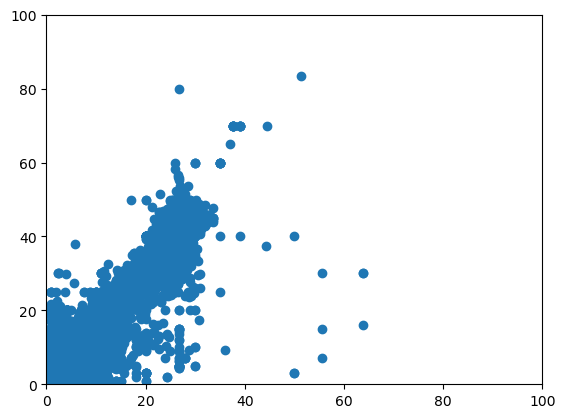

In [14]:
# Create a scatter plot of sales price vs. cost price
plt.scatter(df['Cost Price'], df['Sale Price'])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

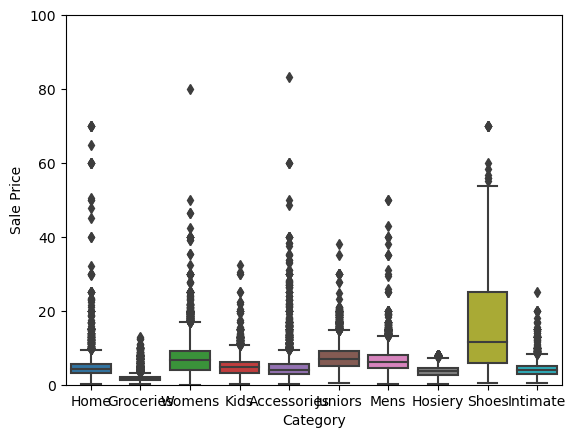

In [15]:
# Create a box plot of sales price by category
sns.boxplot(x='Category', y='Sale Price', data=df)
plt.ylim(0, 100)
plt.show()

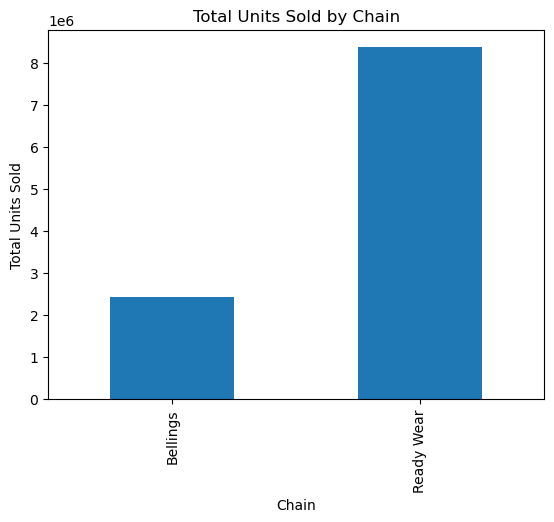

In [16]:
# Create a bar chart of total units sold by chain
total_units = df.groupby('Chain')['Total Units'].sum()
total_units.plot(kind='bar')
plt.xlabel('Chain')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Chain')
plt.show()

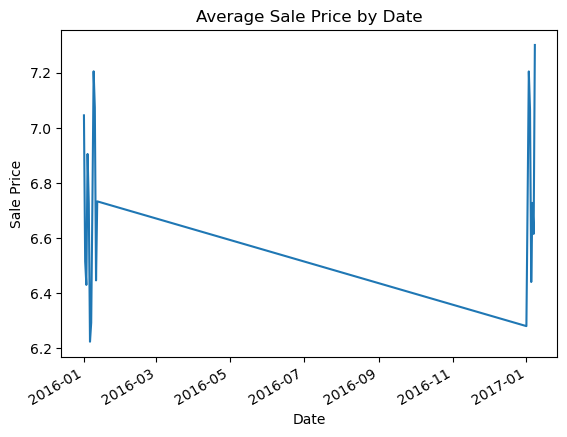

In [17]:
# Create a line chart of sale price by date
sale_price = df.groupby('Date')['Sale Price'].mean()
sale_price.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Sale Price')
plt.title('Average Sale Price by Date')
plt.show()

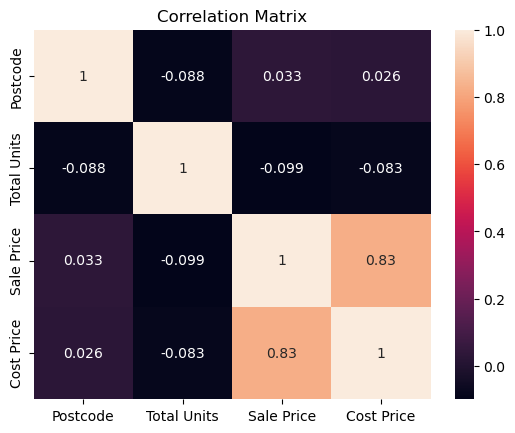

In [18]:
# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

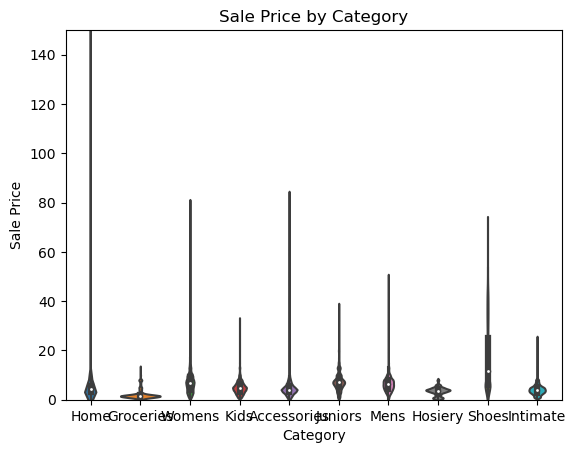

In [19]:
# Create a violin plot of sale price by category
sns.violinplot(x='Category', y='Sale Price', data=df)
plt.xlabel('Category')
plt.ylabel('Sale Price')
plt.ylim(0, 150)
plt.title('Sale Price by Category')
plt.show()

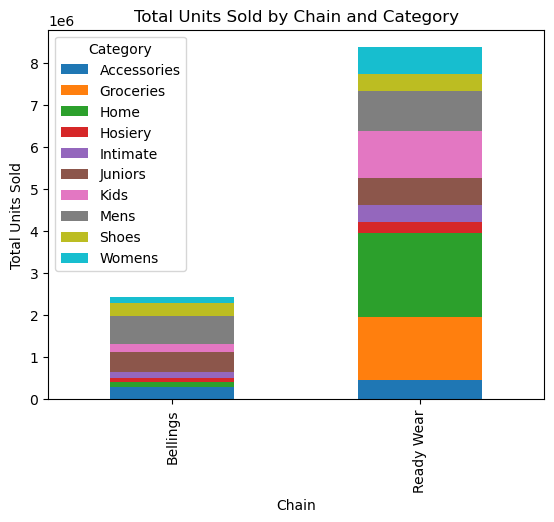

In [20]:
# Create a stacked bar chart of total units sold by chain and category
df.groupby(['Chain', 'Category'])['Total Units'].sum().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Chain')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Chain and Category')
plt.show()

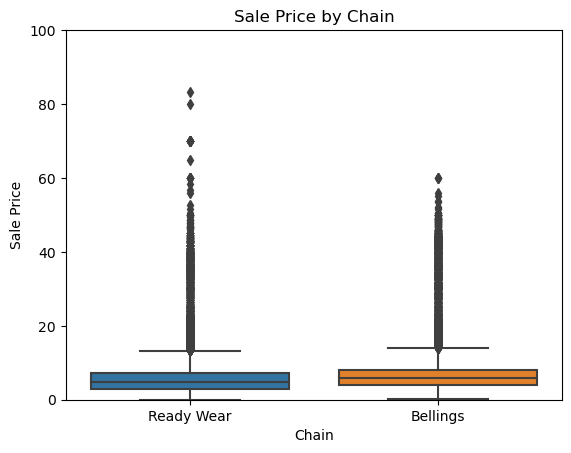

In [21]:
# Create a boxplot of sale price by chain
sns.boxplot(x='Chain', y='Sale Price', data=df)
plt.xlabel('Chain')
plt.ylabel('Sale Price')
plt.ylim(0, 100)
plt.title('Sale Price by Chain')
plt.show()

In [22]:
# Create a scatter plot of sale price and cost price colored by category
fig = px.scatter(df, x='Sale Price', y='Cost Price', color='Category')
fig.update_layout(yaxis_range=[0,100])
fig.update_layout(xaxis_range=[0,100])
fig.show()
# fig.write_image("scatter.png") 

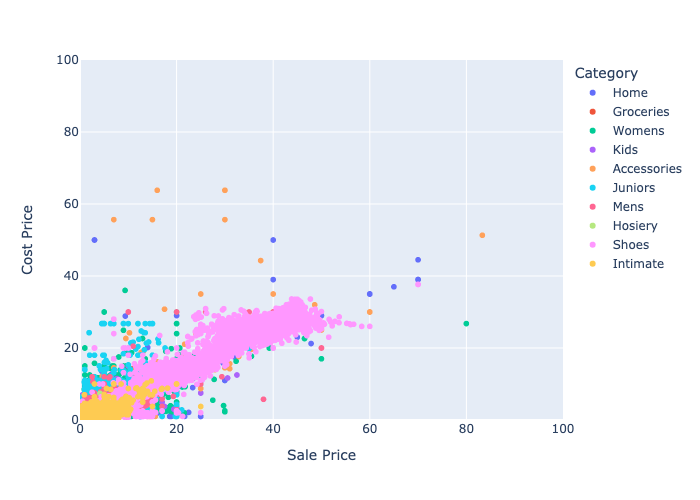

In [23]:
Image(filename='scatter.png')

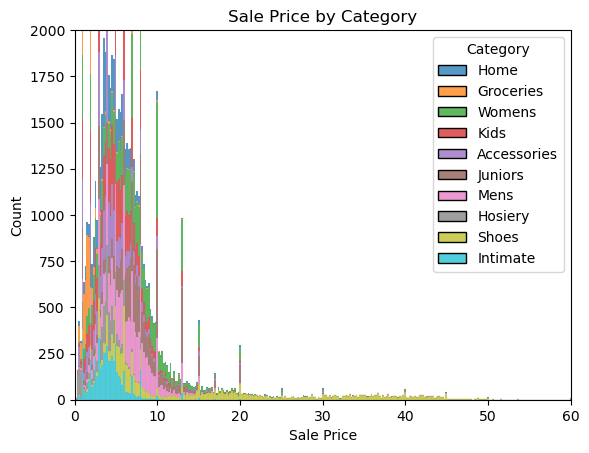

In [24]:
# Create a histogram of sale price by category
sns.histplot(df, x='Sale Price', hue='Category', multiple='stack')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.xlim(0, 60)
plt.ylim(0, 2000)
plt.title('Sale Price by Category')
plt.show()

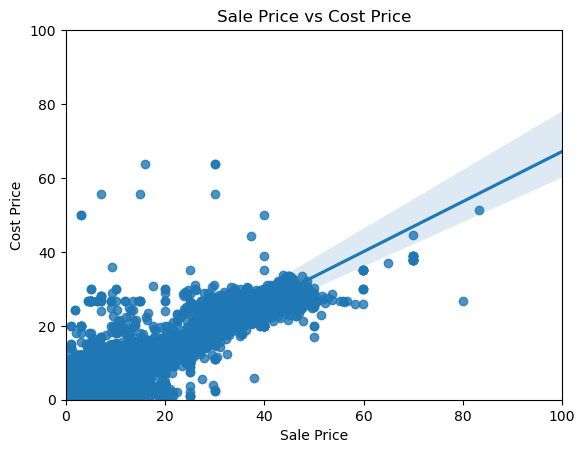

In [25]:
# Create a scatter plot of sale price and cost price with regression line and residuals
sns.regplot(x='Sale Price', y='Cost Price', data=df)
plt.xlabel('Sale Price')
plt.ylabel('Cost Price')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Sale Price vs Cost Price')
plt.show()

In [26]:
# Split the data into training and testing sets
X = df.drop(['Sale Price', 'Date'], axis=1)
y = df['Sale Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to encode using one-hot encoding
columns_to_encode = ['Chain', 'Category']

# Define the column transformer to apply one-hot encoding to the selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), columns_to_encode)
    ],
    remainder='passthrough'
)

# Apply one-hot encoding to the training and testing sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Define a list of regression algorithms to try
regressors = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

# Train and evaluate each algorithm
for regressor in regressors:
    # Train the algorithm
    regressor.fit(X_train_encoded, y_train)
    # Make predictions on the test set
    y_pred = regressor.predict(X_test_encoded)
    # Calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Print the results
    print(f'{regressor.__class__.__name__} RMSE: {rmse:.2f}')

LinearRegression RMSE: 2.97
Ridge RMSE: 2.97
Lasso RMSE: 3.18
DecisionTreeRegressor RMSE: 2.68
RandomForestRegressor RMSE: 2.14


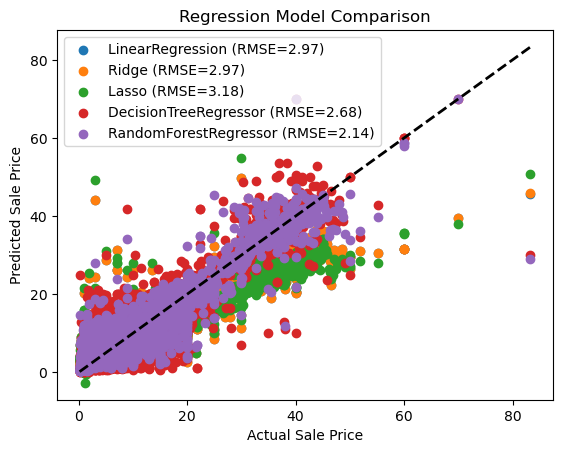

In [27]:
# Train and evaluate each algorithm
for regressor in regressors:
    # Train the algorithm
    regressor.fit(X_train_encoded, y_train)
    # Make predictions on the test set
    y_pred = regressor.predict(X_test_encoded)
    # Calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Plot the predicted versus actual sale prices
    plt.scatter(y_test, y_pred, label=f'{regressor.__class__.__name__} (RMSE={rmse:.2f})')
    
# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add a legend and labels
plt.legend()
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Regression Model Comparison')

# Show the plot
plt.show()


In [28]:
# Train and evaluate each algorithm
for regressor in regressors:
    # Train the algorithm
    regressor.fit(X_train_encoded, y_train)
    # Make predictions on the test set
    y_pred = regressor.predict(X_test_encoded)
    # Calculate the R^2 score
    r2_score = regressor.score(X_test_encoded, y_test)
    # Print the results
    print(f'{regressor.__class__.__name__} R^2 score: {r2_score:.2f}')


LinearRegression R^2 score: 0.78
Ridge R^2 score: 0.78
Lasso R^2 score: 0.75
DecisionTreeRegressor R^2 score: 0.82
RandomForestRegressor R^2 score: 0.89


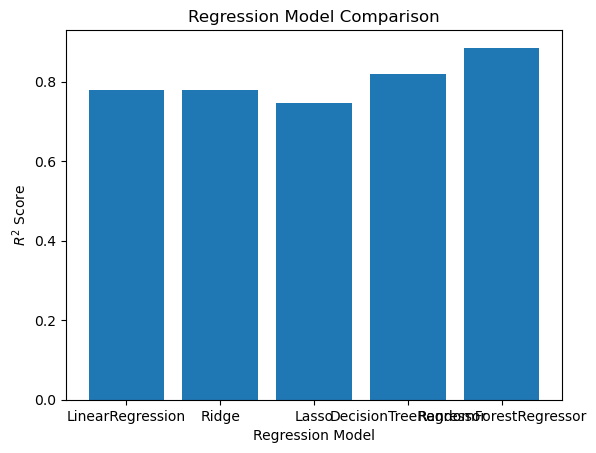

In [29]:
# Train and evaluate each algorithm
r2_scores = []
labels = []
for regressor in regressors:
    # Train the algorithm
    regressor.fit(X_train_encoded, y_train)
    # Make predictions on the test set
    y_pred = regressor.predict(X_test_encoded)
    # Calculate the R^2 score
    r2_score = regressor.score(X_test_encoded, y_test)
    # Add the score and label to the lists
    r2_scores.append(r2_score)
    labels.append(regressor.__class__.__name__)
    
# Plot the bar chart
plt.bar(labels, r2_scores)

# Add labels and a title
plt.xlabel('Regression Model')
plt.ylabel('$R^2$ Score')
plt.title('Regression Model Comparison')

# Show the plot
plt.show()
